![](step-ml-framework.png)

# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt
to build a machine learning model capable of predicting whether or not someone has heart disease based on their  medical attributes

We're going to take following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patience, can we predict whether or not they have heart diesease ?

## 2. Data

* The orginal data came from the CLeverland data from the UCI Machine Learning Repository :https://archive.ics.uci.edu/ml/datasets/heart+disease.
* There is also a version of it available on Kaggele : https://www.kaggle.com/ronitf/heart-disease-uci


## 3. Evaluation

> If we reach 95% accuracy at predicting wheather or not a patient has heart disease during the proof of concept, we'll purse the project

## 4. Features
This is where you'll get different information about each of the features in your data.

#### Create Data Dictionary

age
age in years

sex
(1 = male; 0 = female)

cp
chest pain type

trestbps
resting blood pressure (in mm Hg on admission to the hospital)

chol
serum cholestoral in mg/dl

fbs
(fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)

restecg
resting electrocardiographic results

thalach
maximum heart rate achieved

exang
exercise induced angina (1 = yes; 0 = no)

oldpeak
ST depression induced by exercise relative to rest

# Preparing the tools
we're going to use Pandas,Matplotlib and NumPy for Data Analysis and manipulation.

In [1]:
# Import all the tools

# Regular EDA(Exploratory Data Analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plot to appear in notebook
%matplotlib inline  

# Model from Sciket-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# Load Data

In [2]:
df = pd.read_csv('heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape #( row, columns)

(303, 14)

# Data Exploration (Exploratory Data Analysis or EDA )

The goal is to find out more about the data and become a subject matter expert on the dataset you're working with.

1. what question(s) are we trying to solve
2. what kind of data do we have and how do we treat different types ? (number or string)
3. what's missing from the data and how we deal with it ?
4. where are the outliners and why should we care about it ?
5. How can we add, change or remove the features to get more out of our data ?

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# Let's find out how many of each class there
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

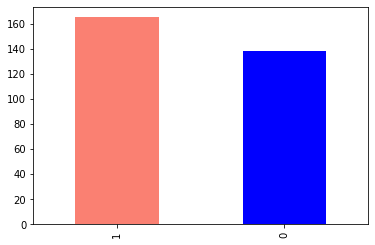

In [7]:
df['target'].value_counts().plot(kind = 'bar', color = ['salmon','blue']);

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# Finding out missing value
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to sex

In [11]:
df.sex.value_counts() # same as df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [12]:
# Compare target column with sex column
pd.crosstab(df['target'],df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

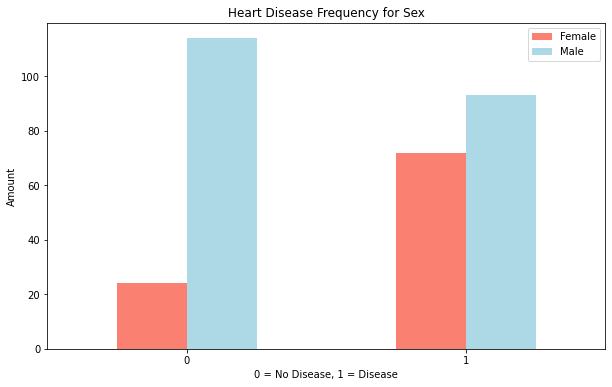

In [13]:
pd.crosstab(df.target,df.sex).plot(kind = 'bar',
                                   figsize = (10, 6),
                                   color = ['salmon','lightblue'])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female','Male'])
plt.xticks(rotation = 0)

In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Age vs Max. Heart Rate(thalach) for Heart Disease

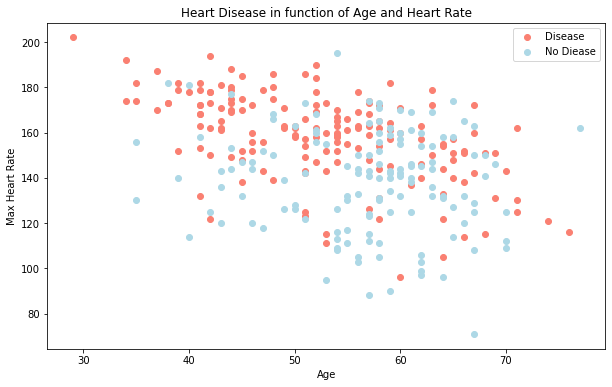

In [15]:
# Create another figure
plt.figure(figsize =(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target == 1],
           df.thalach[df.target == 1],
           c = 'salmon');

# Scatter with negative examples
plt.scatter(df.age[df.target == 0],
           df.thalach[df.target == 0],
           c = 'lightblue');

# Add some helpful info
plt.title('Heart Disease in function of Age and Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease','No Diease']);

### Distribution of Data - if the model is getting wierd check for outliners using hist plot

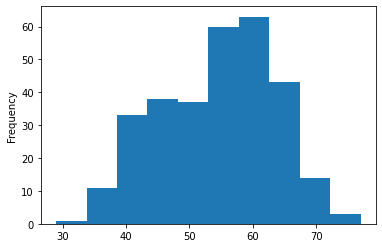

In [16]:
# Check the distribution of the age column with a histograph
df.age.plot.hist();

## Heart Disease frequency per Chest pain type
Chest pain type:
* 0 : Typical Angina - pain decrease blood pressure
* 1 : Atypical angina - pain not related to heart
* 2 : Non-anginal pain - non heart related
* 3 : Asymptomaic - pain showing no sign of disease

In [17]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


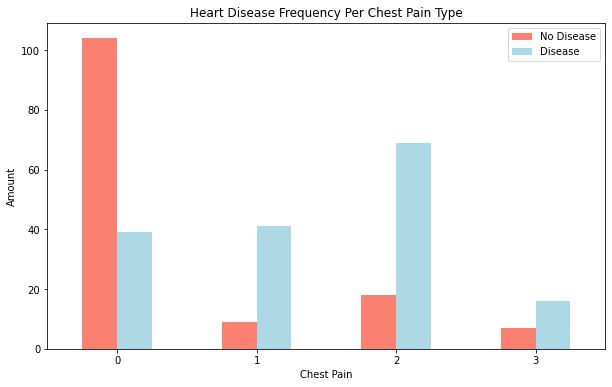

In [18]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind = 'bar',
                                   figsize = (10 ,6),
                                  color = ['salmon','lightblue']);
plt.title('Heart Disease Frequency Per Chest Pain Type')
plt.xlabel('Chest Pain')
plt.ylabel('Amount')
plt.legend(['No Disease','Disease'])
plt.xticks(rotation = 0);

## Making a Correlation Matrix
How independent variable is related to dependent variable

In [19]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


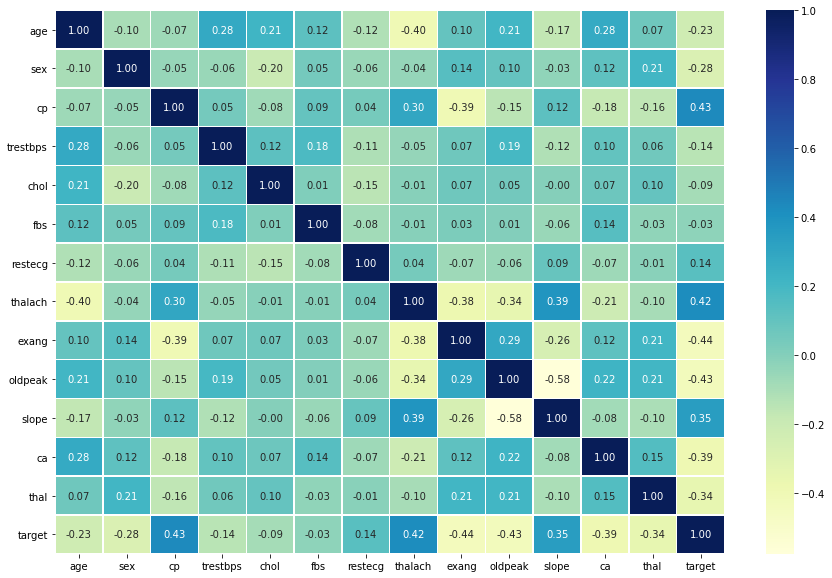

In [20]:
# Let's make a correlation matrix visual
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,annot=True,
                linewidths=0.5,
                fmt = '.2f',
                cmap='YlGnBu');

# Adjustment of axis
# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom + 0.5, top - 0.5)

# Modelling

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
# split the data into X and y
X = df.drop('target',axis=1)
y = df['target']


In [23]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [24]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [25]:
# Split the data into train and test set
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [26]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [27]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

Now we've got our data split into training and test sets, it's time to build a machine learning model.

we'll train it(find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

we're going to try 3 different Machine Leanring models

1. Logistic Regression
2. K-Nearest Neighbours Classifier(KNN)
3. Random Forest Classifier

In [28]:
# Put models in a dictionary
models = {'Logistic Regression': LogisticRegression(),
         'KNN': KNeighborsClassifier(),
         'Random Forest':RandomForestClassifier()}

# create a function to fit and score model
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluate the machine learning models
    models : a dict of dfferent sciket-learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : testing labels
    """
    
    # set random seed
    np.random.seed(42)
    
    # Make a dictionary to store the model score
    model_score = {}
    
    # Looping the model
    for name, model in models.items():
        model.fit(X_train,y_train)              # Fitting the model
        score = model.score(X_test, y_test)     # Evaluate the model
        model_score.update({name : score})       # Recording the score
     
    return model_score


In [29]:
model_scores = fit_and_score(models = models,
                       X_train = X_train,
                       X_test = X_test,
                       y_train = y_train,
                       y_test = y_test)
model_scores

/Users/Shubham/Downloads/Machine_learning_project/heart-disease-project/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

# Model Comparison

In [30]:
model_compare = pd.DataFrame(model_scores, index = ['Accuracy'])
model_compare

,Logistic Regression,KNN,Random Forest
Accuracy,0.885246,0.688525,0.836066


In [31]:
model_compare.T

,Accuracy
Logistic Regression,0.885246
KNN,0.688525
Random Forest,0.836066


(array([0, 1, 2]),
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'KNN'),
  Text(2, 0, 'Random Forest')])

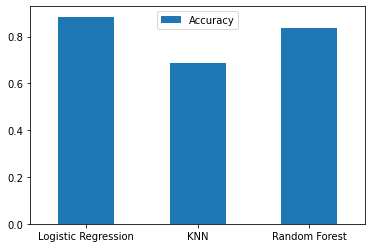

In [32]:
model_compare.T.plot.bar();
plt.xticks(rotation = 0)

Now we're got the baseline model(Logistic regression).. and we know a model's first predictions aren't always what we should based on our next steps off. what should we do ?
![](class_reg.png)
Let's look at the following : 
1. For all models(Classfication, regression etc)
* Hyperparameter tuning - passing different values in model paramteres
* Feature encoding    - converting categorical value(string) into numerical form(One_hot_encoder)

2. For classfication model specfic :
* Confusion matrix - true positive vs false positive
* Cross-validation - split the data into more data sets
* Presion -  propotion of positive identification which were actually correct
* Recall  -  actuall value which were correctly classfied
* F1-score - combiantion of precision and recall
* Classfication Report - 
* ROC curve - ROC curves in logistic regression are used for determining the best cutoff value for predicting whether a new observation is a "failure" (0) or a "success" (1). ... Your observed outcome in logistic regression can ONLY be 0 or 1

* Area under the curve (AUC) - AUC = 1, then the classifier is able to perfectly distinguish between all the Positive and the Negative class points correctly

** roc curve is better then accuracy as roc is calculated in predicted score where as accuracy is calculated on predicted class

## Hyperparameter tuning

In [33]:
# Let's tune KNN
train_score = []
test_score = []

# Create a list for different values for n_estimators
neigbours = range(1, 21)

# Setup KNN instance
KNN = KNeighborsClassifier()

# loop through different n_neighbours
for i in neigbours:
    KNN.set_params(n_neighbors = i)
    
    # Fit the model
    KNN.fit(X_train, y_train)
    
    # Updating the trainig score
    train_score.append(KNN.score(X_train, y_train))
    
    
    # updating the test score
    test_score.append(KNN.score(X_test,y_test))

Max value of KNN accuracy score is 75.41% 


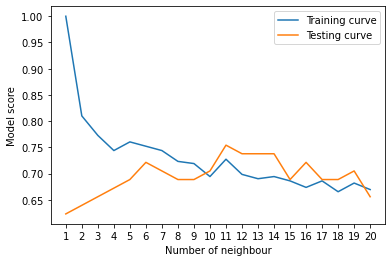

In [34]:
# Let's visualize the data
plt.plot(neigbours,train_score , label = 'Training curve')
plt.plot(neigbours, test_score , label = 'Testing curve')
plt.xticks(np.arange(1,21,1))
plt.xlabel('Number of neighbour')
plt.ylabel('Model score')
plt.legend();
print(f'Max value of KNN accuracy score is {max(test_score)*100:.2f}% ')

as we show even tuning the hyperparamter of knn the model accuracy score is still less then other 2 models
so we dicard the knn model
# Hyperparamter tuning with RandomizedSearchCV
we're going to tune :

1. LogisticRegression Model
2. Random Forest Classfier

...using RandomizedSearchCV

C : inverse of regularozation
Regularization is applying a penalty to increasing the magnitude of parameter values in order to reduce overfitting. When you train a model such as a logistic regression model, you are choosing parameters that give you the best fit to the data. This means minimizing the error between what the model predicts for your dependent variable given your data compared to what your dependent variable actually is.

The problem comes when you have a lot of parameters (a lot of independent variables) but not too much data. In this case, the model will often tailor the parameter values to idiosyncrasies in your data -- which means it fits your data almost perfectly. However because those idiosyncrasies don't appear in future data you see, your model predicts poorly.

To solve this, as well as minimizing the error as already discussed, you add to what is minimized and also minimize a function that penalizes large values of the parameters. Most often the function is λΣθj2, which is some constant λ times the sum of the squared parameter values θj2. The larger λ is the less likely it is that the parameters will be increased in magnitude simply to adjust for small perturbations in the data. In your case however, rather than specifying λ, you specify C=1/λ.

so lesser the value of C,  model is more regularizes(Generalized)

https://medium.com/@DockerTurtle/to-master-machine-learning-understand-linear-regression-basics-dfb8f9174db6

detail of solver :  https://towardsdatascience.com/dont-sweat-the-solver-stuff-aea7cddc3451
* n_estimators = number of trees in the foreset
* max_features = max number of features considered for splitting a node
* max_depth = max number of levels in each decision tree
* min_samples_split = min number of data points placed in a node before the node is split
* min_samples_leaf = min number of data points allowed in a leaf node
* bootstrap = method for sampling data points (with or without replacement)

In [35]:
# create a hyperparameter grid of logistic regression
log_reg_grid = {"C": np.logspace(-4, 4, 20),  # more info of logspace = https://machinelearningknowledge.ai/tutorial-numpy-arange-numpy-linspace-numpy-logspace-in-python/
               'solver' :  ['liblinear']
               } 

# Create a hyperparametergrid of random forest classifier
rf_grid = {
         'n_estimators' : np.arange(10,100,50),
         'max_depth' : [None, 3, 5, 10],
         'min_samples_split' : np.arange(2, 20, 2),
         'min_samples_leaf' : np.arange(1,20, 2)
}

In [36]:
# Tune logistic Regression

np.random.seed(42)

# set the Random hyperparameter search for Logisticregression
rs_log_reg = RandomizedSearchCV(LogisticRegression(), 
                               param_distributions= log_reg_grid,
                               cv = 5,
                               n_iter= 20,
                               verbose=True)

# Fitting the model
rs_log_reg.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

### Finding the best paramter value for the model

In [37]:
# After tuning by default it will take the best parameter value for scoring the model
rs_log_reg.best_params_ 

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [38]:
# Evaluate the Randomized Seaach RandomForestClassifier Model
rs_log_reg.score(X_test,y_test)

0.8852459016393442

In [39]:
# Tuning Random Forest classifier

np.random.seed(42)

# set for random Hyperparameter search for RandomForestClassifier
rs_rf_clf = RandomizedSearchCV(RandomForestClassifier(),
                              param_distributions= rf_grid,
                              n_iter = 100,
                              verbose= True)

# Fitting the model
rs_rf_clf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   32.5s finished


RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 60])},
                   verbose=True)

### Finding the best paramter value for the model

In [40]:
rs_rf_clf.best_params_ # After tuning by default it will take the best parameter value for scoring the model

{'n_estimators': 10,
 'min_samples_split': 14,
 'min_samples_leaf': 13,
 'max_depth': 3}

In [41]:
# Evaluate the Randomized Seaach RandomForestClassifier Model
rs_rf_clf.score(X_test,y_test)  

0.8688524590163934

In [42]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

# Hyperparameter tuning with GridSearchCV

Since our logistic Regression provide us the best score so far..,
we'll try and improve them again using GridSearchCV..

In [43]:
# Different Hyperparameter for our logisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                'solver': ['liblinear']
               }

# Setup for GridSearchCV
gs_log_reg = GridSearchCV(LogisticRegression(), 
                          param_grid= log_reg_grid,
                         cv=5,
                        verbose=True)

# Fitting Our model
gs_log_reg.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.9s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [44]:
# Finding the best parameter for our model
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [45]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [46]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

# Evaluating our tuned machine learning classifier, Beyoud Accuracy

* ROC Curve and AUC score -  It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. 
more info. : https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

* Confusion matrix : more info https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62
* Classification Report
* Precision
* Recall
* F1-score

...and it would be great if cross validation is used where ever possible.

To make comparisions and evaluate our trained model, first we need to make prediction
### ROC _ AUC 

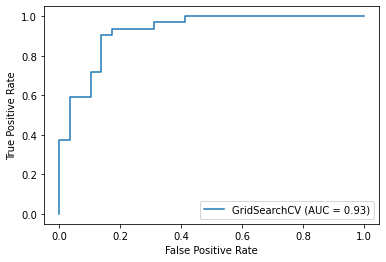

In [47]:
# plot the ROC curve and calculate AUC matrix
plot_roc_curve(gs_log_reg,X_test, y_test);

### Confusion Matrix

In [48]:
# Confusion matrix
y_preds = gs_log_reg.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_preds)
print(conf_matrix )

[[25  4]
 [ 3 29]]


<AxesSubplot:>

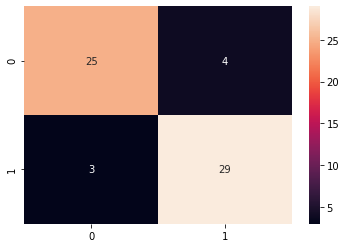

In [49]:
sns.heatmap(conf_matrix,annot=True)

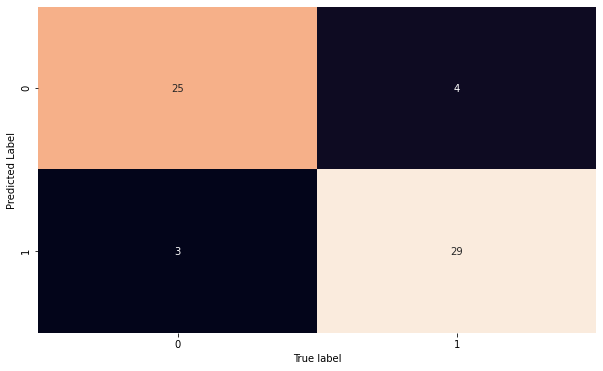

In [50]:
def plot_cof_mat(y_test, y_preds):
    """
    Plotting a nice confusion matrix using Seaborn's heatmap
    """


    conf_matrix = confusion_matrix(y_test, y_preds)
    
    fig, ax = plt.subplots(figsize = (10,6))
    sns.heatmap(conf_matrix, annot= True,
               cbar=False)
    plt.xlabel('True label')
    plt.ylabel('Predicted Label')

plot_cof_mat(y_test,y_preds)

## Classification Report i.e precision, recall, f1 etc

In [51]:
print(classification_report(y_test, y_preds)) # work on single test set

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



# Using Cross validation - Classification Report

In [52]:
# using cross validation
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [53]:
clf = LogisticRegression(C = 0.20433597178569418, 
                        solver = 'liblinear')

In [54]:
# Accuracy score
cv_acc = cross_val_score(clf, X, y,
                        cv = 5,
                        scoring = 'accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [55]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [56]:
# precision score
cv_precision = cross_val_score(clf, X, y,
                        cv = 5,
                        scoring = 'precision')
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [57]:
# recall score
cv_recall = cross_val_score(clf, X, y,
                        cv = 5,
                        scoring = 'recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [58]:
# f1 score
cv_f1 = cross_val_score(clf, X, y,
                        cv = 5,
                        scoring = 'f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

In [59]:
# Let's visulize the classification report generated using cross validation

clf_dict = {'Accucary' : cv_acc,
                          'Precision' : cv_precision,
                          'Recall' :    cv_recall,
                          'F1-score' : cv_f1}
                         
clf_df = pd.DataFrame(clf_dict, index = [0])
clf_df

,Accucary,Precision,Recall,F1-score
0,0.844699,0.820794,0.921212,0.867301


Rectangle(xy=(-0.25, 0), width=0.5, height=0.844699, angle=0)
0.5 0.8446994535519124 -0.25 0
Rectangle(xy=(0.75, 0), width=0.5, height=0.820794, angle=0)
0.5 0.8207936507936507 0.75 0
Rectangle(xy=(1.75, 0), width=0.5, height=0.921212, angle=0)
0.5 0.9212121212121213 1.75 0
Rectangle(xy=(2.75, 0), width=0.5, height=0.867301, angle=0)
0.5 0.8673007976269721 2.75 0


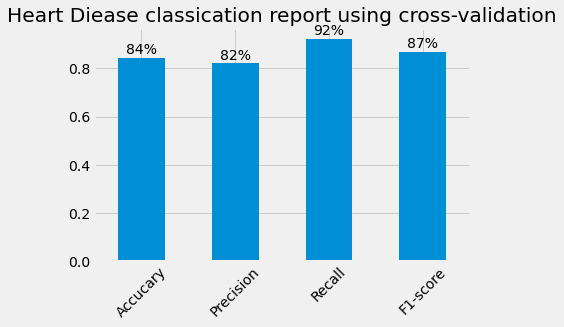

In [116]:
plt.style.use('fivethirtyeight')
ax = clf_df.T.plot.bar(title = 'Heart Diease classication report using cross-validation',legend = False)
plt.xticks(rotation = 45);

# Add this loop to add the annotations(displaying the % on top of bar)
for p in ax.patches:
    print(p)
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    print(width,height,x,y)
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')

In [81]:
# plt.style.available
clf_df

,Accucary,Precision,Recall,F1-score
0,0.844699,0.820794,0.921212,0.867301


Rectangle(xy=(-0.1, 0), width=0.2, height=0.844699, angle=0)
0.2 0.8446994535519124 -0.1 0
Rectangle(xy=(0.9, 0), width=0.2, height=0.820794, angle=0)
0.2 0.8207936507936507 0.9 0
Rectangle(xy=(1.9, 0), width=0.2, height=0.921212, angle=0)
0.2 0.9212121212121213 1.9 0
Rectangle(xy=(2.9, 0), width=0.2, height=0.867301, angle=0)
0.2 0.8673007976269721 2.9 0


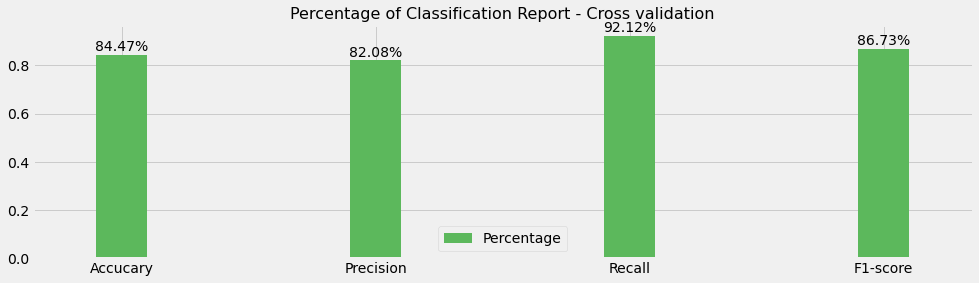

In [146]:
colors_list = ['#5cb85c','#5bc0de','#d9534f']

# # Normalize result
# result_pct = result.div(result.sum(1), axis=0)

ax = clf_df.T.plot(kind='bar',figsize=(15,4),width = 0.2,color = colors_list,edgecolor=None)

plt.legend(labels = ['Percentage'],)
#plt.legend(labels=clf_df.columns,fontsize= 14)
plt.title("Percentage of Classification Report - Cross validation",fontsize= 16)

plt.xticks(rotation = 0,fontsize=14)
# for spine in plt.gca().spines.values():
#     spine.set_visible(False)
# plt.yticks([])


# Add this loop to add the annotations
for p in ax.patches:
    print(p)
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    print(width,height,x,y)
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center')

## Feature importance
which feature contribute how much of it for predicting the target value
*  tell at what % value of features like age, sex etc will help to predict the target value example : `coef_`

Let's find the feature importance for our Logistic regression model

In [120]:
# Let's instantiate and fit our model
gs_log_reg.best_params_
clf = LogisticRegression(C = 0.20433597178569418,
                        solver = 'liblinear')

# Fitting the model
clf.fit(X_train,y_train);

In [121]:
# let's check the coef_
clf.coef_

array([[ 0.00316727, -0.86044582,  0.66067073, -0.01156993, -0.00166374,
         0.04386131,  0.31275787,  0.02459361, -0.60413038, -0.56862852,
         0.45051617, -0.63609863, -0.67663375]])

In [130]:
list(clf.coef_[0])

[0.0031672721856887734,
 -0.860445816920919,
 0.6606707303492849,
 -0.011569930902919925,
 -0.001663741604035976,
 0.04386130751482091,
 0.3127578715206996,
 0.02459360818122666,
 -0.6041303799858143,
 -0.5686285194546157,
 0.4505161679452401,
 -0.6360986316921434,
 -0.6766337521354281]

In [141]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672721856887734,
 'sex': -0.860445816920919,
 'cp': 0.6606707303492849,
 'trestbps': -0.011569930902919925,
 'chol': -0.001663741604035976,
 'fbs': 0.04386130751482091,
 'restecg': 0.3127578715206996,
 'thalach': 0.02459360818122666,
 'exang': -0.6041303799858143,
 'oldpeak': -0.5686285194546157,
 'slope': 0.4505161679452401,
 'ca': -0.6360986316921434,
 'thal': -0.6766337521354281}

In [143]:
# Let's visualize features importance
feature_df = pd.DataFrame(feature_dict,index = [0])
feature_df.T

,0
age,0.003167
sex,-0.860446
cp,0.660671
trestbps,-0.011570
chol,-0.001664
fbs,0.043861
restecg,0.312758
thalach,0.024594
exang,-0.604130
oldpeak,-0.568629


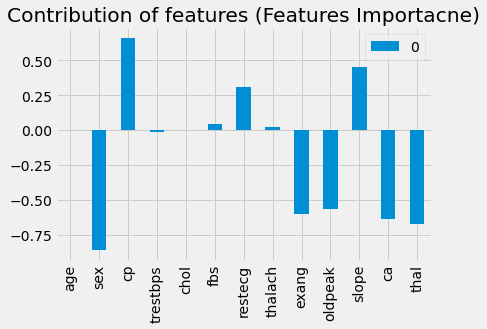

In [162]:
ax = feature_df.T.plot.bar(title = 'Contribution of features (Features Importacne)')



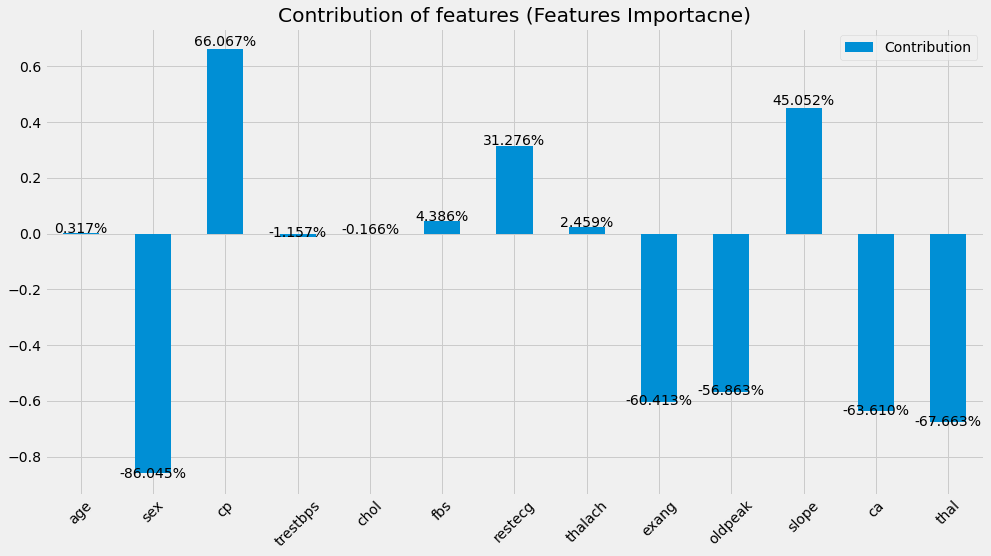

In [161]:
ax = feature_df.T.plot.bar(title = 'Contribution of features (Features Importacne)',figsize = (15,8))
plt.legend(['Contribution'])
plt.xticks(rotation = 45)

# Displaying the value on top of each bar (Annotation)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.3%}', (x + width/2 , y+height*1.02 ), ha = 'center')

In [164]:
pd.crosstab(df['sex'],df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [165]:
pd.crosstab(df['slope'],df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


# 6. Experimentation :

 * could u collect more data ?
 * could u try a better model ? like CatBoost or XGBoost
 * could u improve the current model ?
 * if your model is good enought..? how would u export an share it.?
 